(<Figure size 432x288 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c414390b8>,
       dtype=object))

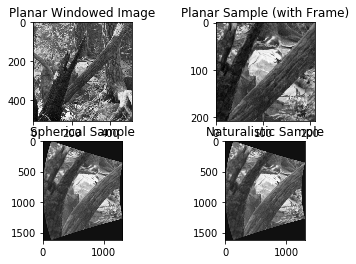

In [19]:
from plot_sample import plot_sample

plot_sample(img, planar_sample_frame, spherical_sample, spherical_abrr_sample)

In [166]:
def inv_project_img_coord_tan_plane_form(X, r, epsilon, chi):
    x1_grid = matlab.double(X[:,0])
    y1_grid = matlab.double(X[:,1])

    x_grid, y_grid = eng.int2hom(x1_grid, y1_grid, nargout=2)

    z_grid = matlab.double(-2 * r * np.ones_like(X[:,0]))


    xc, yc, zc = eng.angles2sphere(r, epsilon, chi, nargout=3)

    x_rot,y_rot,z_rot = eng.inv_rot_plan(x_grid,y_grid,z_grid, xc, yc, zc,r, nargout=3)
    x_proj_sphere, y_proj_sphere, z_proj_sphere = eng.inv_stereographic_proj_center(x_rot,y_rot,z_rot, r, xc,yc,zc, nargout=3)
    x_matrix,y_matrix, z_matrix = eng.sphere2projective(x_proj_sphere, y_proj_sphere, z_proj_sphere, nargout=3)
    x1_matrix, y1_matrix = eng.hom2int(x_matrix, y_matrix, nargout=2)
    U = np.hstack([np.array(x1_matrix), np.array(y1_matrix)])
    return U

In [168]:
img_warp_matlab = skimage.transform.warp(img, inverse_map=inv_project_img_coord_tan_plane_form, map_args=dict(r=16.67/2, epsilon=float(ecc[0]), chi=float(polar[0])))


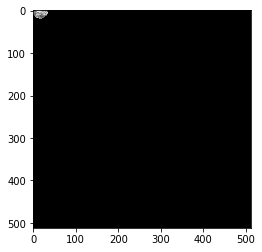

In [169]:
plt.imshow(img_warp_matlab, cmap="gray")

In [ ]:
np.rad2deg(eng.get_spherical_angular_size(r, float(ecc[0]), float(polar[0]), float(128), float(pixel_size[0])))